# Cilj

Naš cilj je, da ustvarimo model za klasifikacijo pacientov COVID-a. Napovedovali bomo **ali je oseba umrla zaradi COVID-a ali ne**.

# Data

**The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**


* `USMER`: Indicates whether the patient treated medical units of the first, second or third level
* `MEDICAL_UNIT`: type of institution of the National Health System that provided the care medical unit
* `SEX`: 1 for female and 2 for male
* `PATIENT_TYPE`: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization
* `DATE_DIED`: If the patient died indicate the date of death, and 9999-99-99 otherwise
* `INTUBED`: whether the patient was connected to the ventilator
* `PNEUMONIA`: whether the patient already have air sacs inflammation or not
* `AGE`: age of the patient
* `PREGNANT`: whether the patient is pregnant or not
* `DIABETES`: whether the patient has diabetes or not
* `COPD`: Indicates whether the patient has Chronic obstructive pulmonary disease or not
* `ASTHMA`: whether the patient has asthma or not
* `INMSUPR`: whether the patient is immunosuppressed or not
* `HIPERTENSION`: whether the patient has hypertension or not
* `OTHER_DISEASE`: whether the patient has other disease or not
* `CARDIOVASCULAR`: whether the patient has heart or blood vessels related disease
* `OBESITY`: whether the patient is obese or not
* `RENAL_CHRONIC`: whether the patient has chronic renal disease or not
* `TOBACCO`: whether the patient is a tobacco user
* `CLASIFFICATION_FINAL`: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive
* `ICU`:Indicates whether the patient had been admitted to an Intensive Care Unit


**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Covid Data.csv")
print("Shape", df.shape)
df.head()

Shape (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


---

## Data Overview

**Preglejte kakšnega datatipa so podatki**.
* Kaj nam te tipi povejo?
* Bomo rabili narediti kaj posebnega glede naših podatkov?

In [8]:
# Rešitev:
df.head()


#df.isnull().sum()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [11]:
df.describe(include="all")

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,...,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,...,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

---

## Preprocessing data

**Pripravimo naš `DEATH` target stolpec**
* Ustvarimo stolpec, kjer vrednost 1 pomeni, da je oseba umrla. Vrednost 2 pomeni, da oseba ni umrla

In [15]:
# Rešitev
filter_ = df["DATE_DIED"] == "9999-99-99"
df["DEATH"] = 0
df.loc[filter_, "DEATH"] = 1

df["DEATH"].value_counts()

DEATH
1    971633
0     76942
Name: count, dtype: int64

In [16]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df["DATE_DIED"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [17]:
df["ASTHMA"].value_counts()

ASTHMA
2     1014024
1       31572
98       2979
Name: count, dtype: int64

---

**Odstranite vrstice z mankajočimi vrednostmi**

In [18]:
# Rešitev
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEATH                   0
dtype: int64

In [19]:
print(f"{'Column':20}\t Unique values")
for i in df.columns:
    print(f"{i:20}=>\t",len(df[i].unique()))

Column              	 Unique values
USMER               =>	 2
MEDICAL_UNIT        =>	 13
SEX                 =>	 2
PATIENT_TYPE        =>	 2
DATE_DIED           =>	 401
INTUBED             =>	 4
PNEUMONIA           =>	 3
AGE                 =>	 121
PREGNANT            =>	 4
DIABETES            =>	 3
COPD                =>	 3
ASTHMA              =>	 3
INMSUPR             =>	 3
HIPERTENSION        =>	 3
OTHER_DISEASE       =>	 3
CARDIOVASCULAR      =>	 3
OBESITY             =>	 3
RENAL_CHRONIC       =>	 3
TOBACCO             =>	 3
CLASIFFICATION_FINAL=>	 7
ICU                 =>	 4
DEATH               =>	 2


In [20]:
df["PREGNANT"].unique()

array([ 2, 97, 98,  1], dtype=int64)

In [21]:
df["DIABETES"].value_counts()

DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64

In [22]:
df = df[(df["PNEUMONIA"] == 1) | (df["PNEUMONIA"] == 2)]
df = df[(df["DIABETES"] == 1) | (df["DIABETES"] == 2)]
df = df[(df["COPD"] == 1) | (df["COPD"] == 2)]
df = df[(df["ASTHMA"] == 1) | (df["ASTHMA"] == 2)]
df = df[(df["INMSUPR"] == 1) | (df["INMSUPR"] == 2)]
df = df[(df["HIPERTENSION"] == 1) | (df["HIPERTENSION"] == 2)]
df = df[(df["OTHER_DISEASE"] == 1) | (df["OTHER_DISEASE"] == 2)]
df = df[(df["CARDIOVASCULAR"] == 1) | (df["CARDIOVASCULAR"] == 2)]
df = df[(df["OBESITY"] == 1) | (df["OBESITY"] == 2)]
df = df[(df["RENAL_CHRONIC"] == 1) | (df["RENAL_CHRONIC"] == 2)]
df = df[(df["TOBACCO"] == 1) | (df["TOBACCO"] == 2)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025152 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1025152 non-null  int64 
 1   MEDICAL_UNIT          1025152 non-null  int64 
 2   SEX                   1025152 non-null  int64 
 3   PATIENT_TYPE          1025152 non-null  int64 
 4   DATE_DIED             1025152 non-null  object
 5   INTUBED               1025152 non-null  int64 
 6   PNEUMONIA             1025152 non-null  int64 
 7   AGE                   1025152 non-null  int64 
 8   PREGNANT              1025152 non-null  int64 
 9   DIABETES              1025152 non-null  int64 
 10  COPD                  1025152 non-null  int64 
 11  ASTHMA                1025152 non-null  int64 
 12  INMSUPR               1025152 non-null  int64 
 13  HIPERTENSION          1025152 non-null  int64 
 14  OTHER_DISEASE         1025152 non-null  int64 
 15  CAR

In [23]:
df.shape

(1025152, 22)

---

**Ustvarite stolpični graf vrednosti `PREGNANT` stolpca, za vsak spol**
* Ustvarite graf
* Popravite vrednosti v kolikor kaj ni vredu

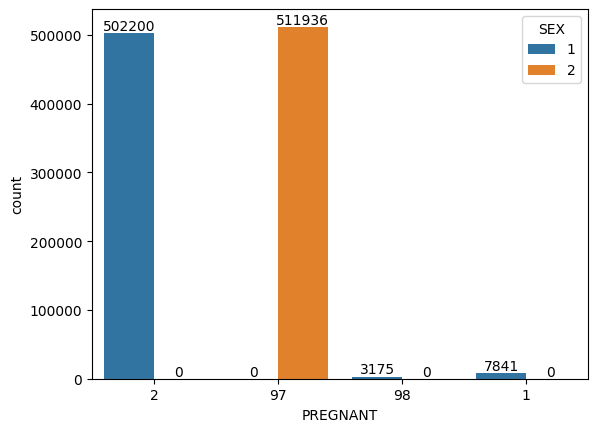

In [25]:
# Rešitev
plt.figure()
df_copy = df.copy()
df_copy['SEX'] = df_copy['SEX'].astype(str)
df_copy['PREGNANT'] = df_copy['PREGNANT'].astype(str)
ax = sns.countplot(df_copy, x="PREGNANT", hue="SEX")
for a in ax.containers:
    plt.bar_label(a)
plt.show()

In [26]:
df["PREGNANT"] = df["PREGNANT"].replace(97, 2)

In [27]:
df = df[(df["PREGNANT"] ==1) | (df["PREGNANT"] == 2)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1021977 non-null  int64 
 1   MEDICAL_UNIT          1021977 non-null  int64 
 2   SEX                   1021977 non-null  int64 
 3   PATIENT_TYPE          1021977 non-null  int64 
 4   DATE_DIED             1021977 non-null  object
 5   INTUBED               1021977 non-null  int64 
 6   PNEUMONIA             1021977 non-null  int64 
 7   AGE                   1021977 non-null  int64 
 8   PREGNANT              1021977 non-null  int64 
 9   DIABETES              1021977 non-null  int64 
 10  COPD                  1021977 non-null  int64 
 11  ASTHMA                1021977 non-null  int64 
 12  INMSUPR               1021977 non-null  int64 
 13  HIPERTENSION          1021977 non-null  int64 
 14  OTHER_DISEASE         1021977 non-null  int64 
 15  CAR

---

**Ustvarite graf za stolpca `INTUBED` in `ICU`**

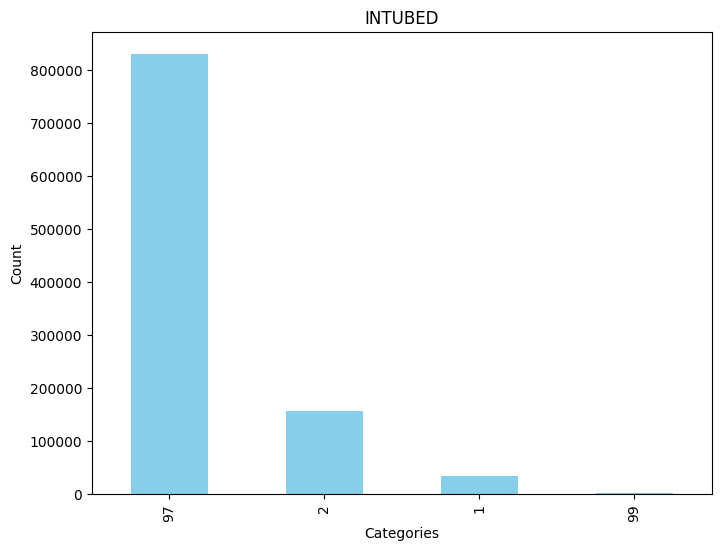

In [29]:
# Rešitev:
plt.figure(figsize=(8, 6))
df['INTUBED'].value_counts().plot(kind='bar', color='skyblue')
plt.title('INTUBED')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

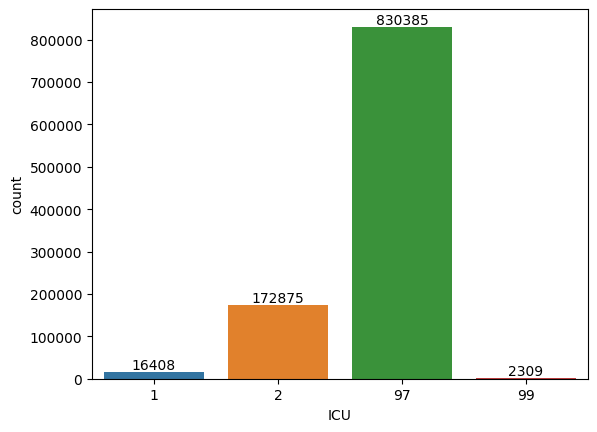

In [30]:
plt.figure()
ax = sns.countplot(df, x="ICU")
plt.bar_label(ax.containers[0])
plt.show()

In [33]:
df.loc[(df["ICU"] == 97) | (df["ICU"] == 99), "ICU"] = 2
df["ICU"].value_counts()

ICU
2    1005569
1      16408
Name: count, dtype: int64

In [34]:
df.drop(columns=["INTUBED","DATE_DIED"], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1021977 non-null  int64
 1   MEDICAL_UNIT          1021977 non-null  int64
 2   SEX                   1021977 non-null  int64
 3   PATIENT_TYPE          1021977 non-null  int64
 4   PNEUMONIA             1021977 non-null  int64
 5   AGE                   1021977 non-null  int64
 6   PREGNANT              1021977 non-null  int64
 7   DIABETES              1021977 non-null  int64
 8   COPD                  1021977 non-null  int64
 9   ASTHMA                1021977 non-null  int64
 10  INMSUPR               1021977 non-null  int64
 11  HIPERTENSION          1021977 non-null  int64
 12  OTHER_DISEASE         1021977 non-null  int64
 13  CARDIOVASCULAR        1021977 non-null  int64
 14  OBESITY               1021977 non-null  int64
 15  RENAL_CHRONIC       

---

## Data visualization

**Ustvarite graf za stolpec `DEATH`**
* Kaj lahko razberemo iz grafa?

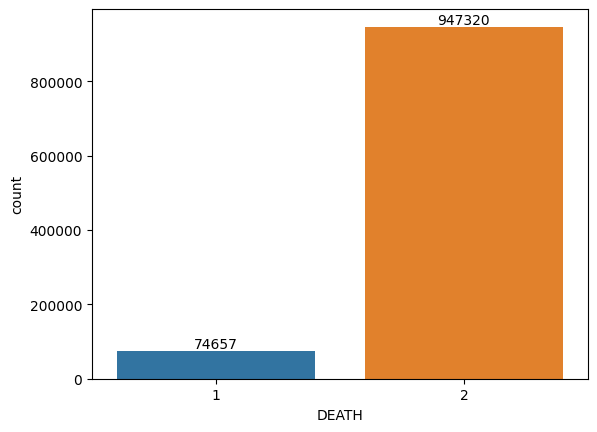

In [39]:
# Rešitev:
# Rešitev:
plt.figure()
ax = sns.countplot(df, x="DEATH")
plt.bar_label(ax.containers[0])
plt.show()

---

**Plot razporeditve starosti glede na DEATH stolpec**
* Kaj lahko razberemo iz grafa?

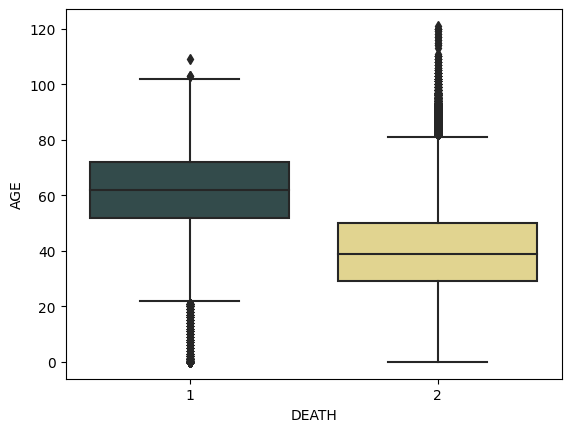

In [40]:
# Rešitev:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.show()

In [41]:
df["AGE"].max()

121

---

**Graf razporeditve starosti glede na `DEATH` in `SEX`**
* Kaj lahko razberemo iz grafa?

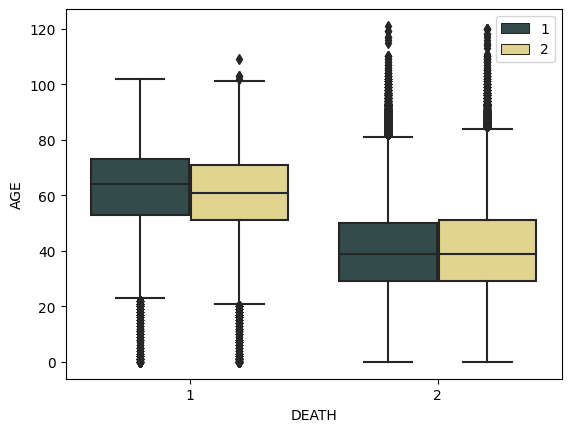

In [46]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.legend(loc="best")
plt.show()

----

## Model creation

**Spremenite kategorične stolpce, ki imajo več kot 2 kategoriji**

In [47]:
# Rešitev:
print(f"{'Column':20}\t Unique values")
for i in df.columns:
    print(f"{i:20}=>\t",len(df[i].unique()))

Column              	 Unique values
USMER               =>	 2
MEDICAL_UNIT        =>	 13
SEX                 =>	 2
PATIENT_TYPE        =>	 2
PNEUMONIA           =>	 2
AGE                 =>	 121
PREGNANT            =>	 2
DIABETES            =>	 2
COPD                =>	 2
ASTHMA              =>	 2
INMSUPR             =>	 2
HIPERTENSION        =>	 2
OTHER_DISEASE       =>	 2
CARDIOVASCULAR      =>	 2
OBESITY             =>	 2
RENAL_CHRONIC       =>	 2
TOBACCO             =>	 2
CLASIFFICATION_FINAL=>	 7
ICU                 =>	 2
DEATH               =>	 2


In [48]:
df = pd.get_dummies(df, columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"], drop_first=True)
df

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1,65,2,2,2,2,2,...,False,False,False,False,False,True,False,False,False,False
1,2,2,1,1,72,2,2,2,2,2,...,False,False,False,False,False,False,False,True,False,False
2,2,2,2,2,55,2,1,2,2,2,...,False,False,False,False,False,True,False,False,False,False
3,2,1,1,2,53,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,True
4,2,2,1,2,68,2,1,2,2,2,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,40,2,2,2,2,2,...,False,False,False,True,False,False,False,False,False,True
1048571,1,2,2,2,51,2,2,2,2,2,...,False,False,False,True,False,False,False,False,False,True
1048572,2,2,1,2,55,2,2,2,2,2,...,False,False,False,True,False,False,False,False,False,True
1048573,2,2,1,2,28,2,2,2,2,2,...,False,False,False,True,False,False,False,False,False,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021977 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   USMER                   1021977 non-null  int64
 1   SEX                     1021977 non-null  int64
 2   PATIENT_TYPE            1021977 non-null  int64
 3   PNEUMONIA               1021977 non-null  int64
 4   AGE                     1021977 non-null  int64
 5   PREGNANT                1021977 non-null  int64
 6   DIABETES                1021977 non-null  int64
 7   COPD                    1021977 non-null  int64
 8   ASTHMA                  1021977 non-null  int64
 9   INMSUPR                 1021977 non-null  int64
 10  HIPERTENSION            1021977 non-null  int64
 11  OTHER_DISEASE           1021977 non-null  int64
 12  CARDIOVASCULAR          1021977 non-null  int64
 13  OBESITY                 1021977 non-null  int64
 14  RENAL_CHRONIC           1021977 non-nul

---

**Razdelite podatke na train-test**

In [50]:
# Rešitev:
X = df.drop(columns="DEATH")
y = df["DEATH"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (817581, 35)
Test_x : (204396, 35)
Train_y : (817581,)
Test_y : (204396,)


---

**Ustvarite model**
* izberite poljuben model

In [52]:
# Rešitev:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train["AGE"].values.reshape(-1, 1))
X_train["AGE"] = scaler.transform(X_train["AGE"].values.reshape(-1, 1))
X_test["AGE"] = scaler.transform(X_test["AGE"].values.reshape(-1, 1))

In [53]:
X_train.describe()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
count,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000,817581.000000
mean,1.641828,1.501175,1.187772,1.865533,0.346271,1.992351,1.880086,1.985921,1.970358,1.986836,1.844055,1.973545,1.980282,1.846641,1.982021,1.919113,1.983856
std,0.479463,0.499999,0.390530,0.341154,0.138451,0.087126,0.324861,0.117818,0.169599,0.113979,0.362804,0.160484,0.139029,0.360333,0.132874,0.272662,0.126029
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,0.247934,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,1.000000,2.000000,0.330579,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,1.000000,2.000000,0.438017,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [54]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train ,y_train)
print("Logistic Regression Accuracy :",logreg.score(X_test, y_test))

Logistic Regression Accuracy : 0.9410262431750132


C:\Users\ygreg\OneDrive\Desktop\LTFE\ICTA\03_Python_Machine_Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

**Prikažite F1 score za oba razreda in confision matrix**

In [55]:
# Rešitev
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(y_test, logreg.predict(X_test),average=None))

Logistic Regression F1 Score : [0.53748753 0.96850521]


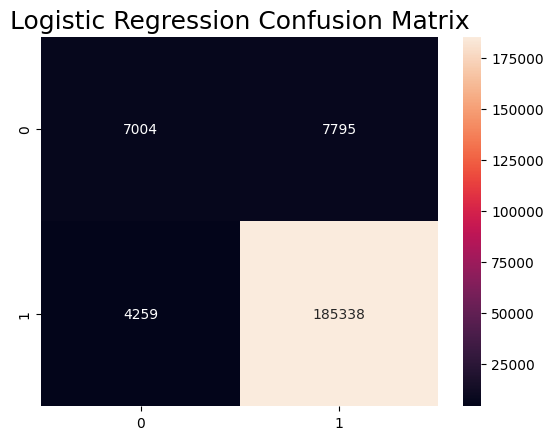

In [56]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18);

---

**Poizkusimo izboljšati rezultat**

Da izboljšamo rezultat lahko balanciramo naš dataset.

Imamo 2 tehinki
* Undersampling - keeping all of the data in the minority class and decreasing the size of the majority class
* Oversampling - duplicate rows in the minority class

(Uporabite undersampling)

In [57]:
# Rešitev:

death_samples = (df["DEATH"] == 1).sum()
survived_df = df[df["DEATH"] == 2].sample(death_samples)


In [59]:
df_balanced = pd.concat([df[df["DEATH"]==1], survived_df])
df_balanced

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1,65,2,2,2,2,2,...,False,False,False,False,False,True,False,False,False,False
1,2,2,1,1,72,2,2,2,2,2,...,False,False,False,False,False,False,False,True,False,False
2,2,2,2,2,55,2,1,2,2,2,...,False,False,False,False,False,True,False,False,False,False
3,2,1,1,2,53,2,2,2,2,2,...,False,False,False,False,False,False,False,False,False,True
4,2,2,1,2,68,2,1,2,2,2,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186690,2,1,1,2,51,2,2,2,1,2,...,False,False,False,False,False,False,False,False,True,False
583397,1,1,1,2,55,2,2,2,2,2,...,False,False,True,False,False,True,False,False,False,False
845607,2,1,1,2,44,2,2,2,2,2,...,False,False,True,False,False,False,False,False,False,True
587570,2,2,1,2,23,2,2,2,2,2,...,False,False,True,False,False,True,False,False,False,False


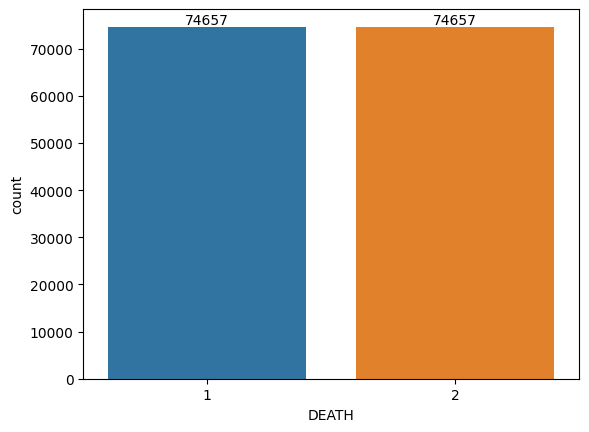

In [60]:
plt.figure()
ax = sns.countplot(df_balanced, x="DEATH")
plt.bar_label(ax.containers[0])
plt.show()

----

**Uporabite nove podatke z izdelavo modela**

Prikažite F1 in confusion matrix.

In [61]:
# Rešitev:
X_bal = df_balanced.drop(columns="DEATH")
y_bal = df_balanced["DEATH"]

In [62]:
from sklearn.model_selection import train_test_split
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)
print("Train_x :",X_bal_train.shape)
print("Test_x :",X_bal_test.shape)
print("Train_y :",y_bal_train.shape)
print("Test_y :",y_bal_test.shape)

Train_x : (119451, 35)
Test_x : (29863, 35)
Train_y : (119451,)
Test_y : (29863,)


In [63]:
logreg = LogisticRegression()
logreg.fit(X_bal_train, y_bal_train)
print("Logistic Regression Accuracy :",logreg.score(X_bal_test, y_bal_test))

Logistic Regression Accuracy : 0.9078123430331849


C:\Users\ygreg\OneDrive\Desktop\LTFE\ICTA\03_Python_Machine_Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print("Logistic Regression F1 Score :",f1_score(y_bal_test,logreg.predict(X_bal_test),average=None))

Logistic Regression F1 Score : [0.90872319 0.90688314]


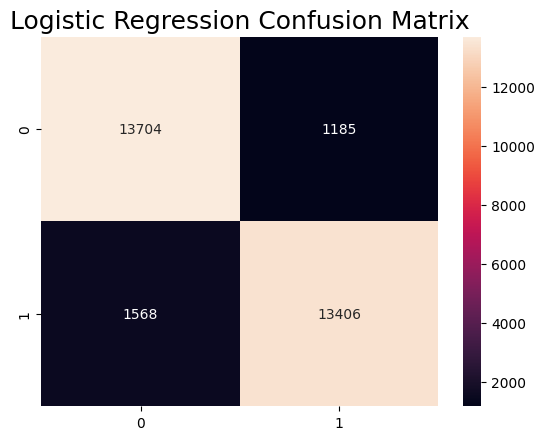

In [65]:
sns.heatmap(confusion_matrix(y_bal_test, logreg.predict(X_bal_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18);

---